In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from github_scraper import get_repo_pull_requests_filterd_data
from github_analyzer import analyze_pr_data
from github_analyzer import plot_merged_pr_counts_per_day

In [3]:
repo_url = 'https://github.com/burnash/gspread'
days_to_analyze = 30
pr_data = get_repo_pull_requests_filterd_data(repo_url, days_to_analyze)
pr_data

[{'number': 1291,
  'title': 'remove Drive API access on Spreadsheet init (FIX - VERSION 5.11.1)',
  'body': 'Adding this line to `Spreadsheet.__init__()`\n\nhttps://github.com/burnash/gspread/blob/817ebb86fd1b98e2eb643eb2e06ffd5bd63544ca/gspread/spreadsheet.py#L40-L41\n\nhas caused many issues (#1286, #1290) due to gspread being used with an API key/access token/etc which does *not* have access to the Drive API.\n\nI propose that we remove this line (effectively reverting #1255) and release a new patch -> v5.11.1.\n\nI think what #1255 fixes (removal of a single API call on two rarely used(?) spreadsheet properties) is not worth the implications that requiring the Drive API by default brings.\n\nI would like to make this change asap but will wait for your approval @lavigne958.',
  'merged_at': datetime.datetime(2023, 9, 6, 22, 0, 28),
  'reviews': [{'username': 'lavigne958',
    'state': 'APPROVED',
    'submitted_at': datetime.datetime(2023, 9, 6, 21, 58, 17)}]},
 {'number': 1288,
  

In [4]:
analysis = analyze_pr_data(pr_data)
analysis

{'merged_pr_counter_per_day': Counter({'2023-08-18': 3,
          '2023-09-06': 1,
          '2023-09-04': 1,
          '2023-08-16': 1,
          '2023-08-13': 1}),
 'approvers_counter': Counter({'lavigne958': 5, 'alifeee': 3}),
 'str_matches_counter': Counter()}

In [13]:
from json import dumps
with open('backup.json', 'w') as f:
    f.write(dumps(analysis,indent=4))

In [5]:
merged_pr_counter_per_day = analysis['merged_pr_counter_per_day']
merged_pr_counter_per_day

Counter({'2023-08-18': 3,
         '2023-09-06': 1,
         '2023-09-04': 1,
         '2023-08-16': 1,
         '2023-08-13': 1})

[1, 1, 3, 1, 1]
<class 'int'>


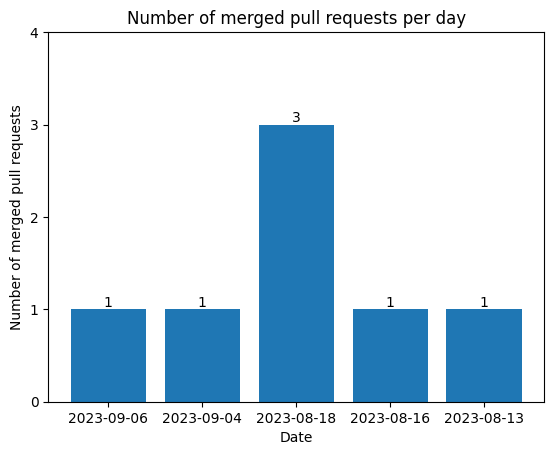

In [30]:
eshta = plot_merged_pr_counts_per_day(merged_pr_counter_per_day)

In [33]:
list(eshta)